# Applied Statistics 8651 2025/2026 Module Assignment
## Author: Ebelechukwu Igwagu
### G00439334@atu.ie

In [99]:

# Import Dependencies
# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random


# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistical functions
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Statistical modeling
# https://www.statsmodels.org/stable/index.html
import statsmodels as sm


## Problem 1 Lady Testing Tea

Problem 1: Extending the Lady Tasting Tea
Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

In [100]:
# Total Number of cups of tea
total_no_of_cups = 12

# Number of cups of tea with tea in first
no_tea_in_first_cups = 8

# Number of cups of tea with milk in first
no_milk_in_first_cups = 4




### The math comb function
This is used to calculate the number of possibilities of choosing k number of things from a total of n items without repetition and order as described [here](https://docs.python.org/3/library/math.html#math.comb) and a simple use case in [w3school](https://www.w3schools.com/python/ref_math_comb.asp).

$$\binom{n}{k} = 
\frac{n!}{k! (n - k)!}
$$

In [101]:
# Calculating total combinations of choosing 4 cups from 12 using the math.comb function
total_combinations = math.comb(total_no_of_cups, no_milk_in_first_cups)

#show
total_combinations

495

In [102]:
# Total number of ways to choose 4 cups from 12
ways_to_choose_4cups = 12 * 11 * 10 * 9

# Show
ways_to_choose_4cups

11880

In [103]:
# ways to shuffle 4 cups
ways_to_shuffle_4cups = 4 * 3 * 2 * 1

# Show
ways_to_shuffle_4cups

24

### Math.factorial function

In [104]:
# Shuffling can also be calculated using the math.factorial function
ways_to_shuffle_4cups_factorial = math.factorial(4)

# Show
ways_to_shuffle_4cups_factorial

24

In [105]:
# All possible combinations of choosing 4 cups from 12

all_combinations  = ways_to_choose_4cups // ways_to_shuffle_4cups

# Show
all_combinations

495

In [106]:
# Labelling all 12 cups of tea as to order it from 0 to 11
labels = list(range(total_no_of_cups))
print("Labels for all cups of tea:", labels)

Labels for all cups of tea: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [123]:
# Generating different ways of choosing cups of tea with milk in first
combinations = list(itertools.combinations(labels, no_milk_in_first_cups))
# Show
print(combinations[:10])  # Displaying first 10 combinations 

[(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 2, 6), (0, 1, 2, 7), (0, 1, 2, 8), (0, 1, 2, 9), (0, 1, 2, 10), (0, 1, 2, 11), (0, 1, 3, 4)]


In [108]:
len(combinations)  

495

In [109]:
# show unique combinations and size 
np.unique(combinations, axis=0) 

array([[ 0,  1,  2,  3],
       [ 0,  1,  2,  4],
       [ 0,  1,  2,  5],
       ...,
       [ 7,  8, 10, 11],
       [ 7,  9, 10, 11],
       [ 8,  9, 10, 11]], shape=(495, 4))

In [110]:
# Choosing 4 cups randomly from the 12 to put milk in  first using the python random selecion`
# https://docs.python.org/3/library/random.html#random.sample

milk_labels = random.sample(labels, no_milk_in_first_cups)

# Sorting th selected labels
milk_labels.sort()

# Show
print("Labels for cups with milk in first:", milk_labels)

Labels for cups with milk in first: [4, 5, 7, 9]


In [111]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(milk_labels)



{4, 5, 7, 9}

In [112]:
# Calculate the overlap of milk labels with all possible combinations
no_milk_label_overlap = []

# Number of combinations to print
max_print = 10

for i, comb in enumerate(combinations):
    # Turn combination and milk_labels into sets
    comb_set = set(comb)
    milk_set = set(milk_labels)

    # Find overlap
    overlap = comb_set.intersection(milk_set)

    # Print only the first `max_print` combinations
    if i < max_print:
        print("Combination:", comb,
              "Length:", len(overlap),
              "Overlap with milk labels:", overlap)

    # Append the size of the overlap to the list
    no_milk_label_overlap.append(len(overlap))


Combination: (0, 1, 2, 3) Length: 0 Overlap with milk labels: set()
Combination: (0, 1, 2, 4) Length: 1 Overlap with milk labels: {4}
Combination: (0, 1, 2, 5) Length: 1 Overlap with milk labels: {5}
Combination: (0, 1, 2, 6) Length: 0 Overlap with milk labels: set()
Combination: (0, 1, 2, 7) Length: 1 Overlap with milk labels: {7}
Combination: (0, 1, 2, 8) Length: 0 Overlap with milk labels: set()
Combination: (0, 1, 2, 9) Length: 1 Overlap with milk labels: {9}
Combination: (0, 1, 2, 10) Length: 0 Overlap with milk labels: set()
Combination: (0, 1, 2, 11) Length: 0 Overlap with milk labels: set()
Combination: (0, 1, 3, 4) Length: 1 Overlap with milk labels: {4}


In [114]:
# Show overlaps
print(no_milk_label_overlap)

[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 2, 3, 2, 3, 2, 2, 2, 1, 2, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 2, 3, 2, 3, 2, 2, 2, 1, 2, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 2, 3, 2, 3, 2, 2, 2, 1, 2, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 

In [115]:
# Calulate the counts of each overlaps
counts = np.unique(no_milk_label_overlap, return_counts=True)

# Show
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))

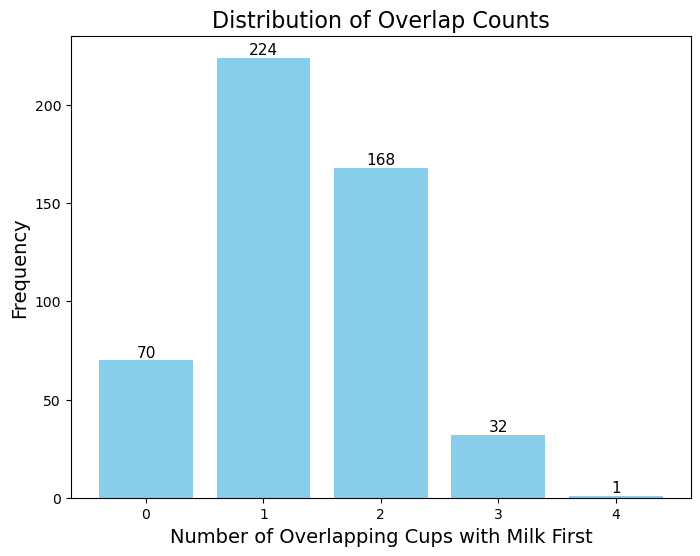

In [116]:
fig, ax = plt.subplots(figsize=(8,6))

# Bar chart
bars = ax.bar(counts[0], counts[1], color='skyblue')

ax.set_xlabel('Number of Overlapping Cups with Milk First', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Distribution of Overlap Counts', fontsize=16)

# Add the number on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,   # x-position
        height,                               # y-position
        str(height),                           # label text
        ha='center', va='bottom', fontsize=11
    )


### Test of Hypothesis

NULL HYPOTHESIS
- The Lady cannot tell the difference between the cups of tea with tea in first versus those with milk in first
- The Lady is randomly choosing the 4 cups of tea frm the 12 at random


ALTERNATE HYPOTHESIS
- The Lady is able to differentiate between the cups of tea with milk in first from those with tea in first

EVIDENCE

In [117]:
# Probability of selecting the 4 cups with milk in first correctly
probability_correct_selection = 1 / total_combinations

# print
print("Probability of selecting the 4 cups with milk in first correctly:", probability_correct_selection)

Probability of selecting the 4 cups with milk in first correctly: 0.00202020202020202


In [118]:
# Probability of selecting at least 3 cups with milk in first
probability_at_least_3 = (32+1) / total_combinations
# show
probability_at_least_3

0.06666666666666667

In [119]:
# Probability of selecting at least 3 cups with milk in first
probability_at_least_3 = (counts[1][3] + counts[1][4]) / total_combinations
# show
probability_at_least_3

np.float64(0.06666666666666667)

### comparing the 12 to 8 milk_tea_cup experiment

## Problem 2: Normal Distribution

Generate 100,000 samples of size 10 from the standard normal distribution.
For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD).
Plot histograms of both sets of values on the same axes with transparency.
Describe the differences you see.
Explain how you expect these differences to change if the sample size is increased.



#### Generating random normal distribution with [numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) which uses the formula np.random.normal(mu, sigma, size)
#### [Real python](https://realpython.com/numpy-random-normal/) random distibution

In [120]:
# Using a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(seed=210)
numbers = 100_000 # samples
size = 10 # sample size

